In [578]:
#colab

# from google.colab import drive
# drive.mount('/content/gdrive')

# import sys
# sys.path.append('/content/gdrive/MyDrive/ajou_ribs/img')

import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
warnings.filterwarnings(action='ignore')

---
# 수학과 201521139 이재학
### Keywords : Frechet distance, interpoint distance
---
### 진행 방식 참고:
<img src="https://user-images.githubusercontent.com/46811558/149611107-c5f7d3c7-3c81-43f6-b100-5f7a186a5b8e.JPG" width="300px" height="300px">

- 하려고하는 배경(목적) -> 해결하기 위한 방법론(장단점극복) -> 새로운 방법제안
- 발표 10분

# Contents
- 논문소개                                                
- 배경지식
  - Hausdorff distance  
    (21.10.27 진행)
  - Dynamic Time Warping(DTW)                         
  - Frechet Distance                    
    - Discrete Frechet Distance
    - Frechet Distance vs Discrete Frechet Distance                         
    - Time Complexity  
    (21.11.10 진행)
  - Distance 사이의 비교  
    (21.11.24 진행)
  - Multidimensional DTW  
    (21.12.08 진행)
  - Similarity Measure to fit data  
    (22.01.12 진행)
- 활용
  - 다차원프레셰 거리 기반 종단자료 군집분석(MFKmL)
  - 대립생성망의 성능 비교에 대한 연구 (FID)
  - 이산 프레셰 거리 척도를 이용한 궤적 유사도 고속계산 휴리스틱
- 논문분석
- 참고

---
# 논문 : [computing the frechet distance between polygonal curves](https://www.worldscientific.com/doi/abs/10.1142/S0218195995000064)    
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611191-2fd66aeb-00f2-4b76-b198-77856f7a1a30.png" width="400px" height="400px">
<br/> 
- 초록  


  - 임의의 차원에서 곡선의 유사성에 대한 측정을 하기 위해, 곡선의 매개변수화가 가능한 프레셰 거리를 고려한다.<br/>
  - 간선이 각 p,q개인 다각형 P,Q의 프레셰 거리는 O(pqlog(pq))의 runtime으로 구할 수 있다.<br/>
  - 더 나아가, 닫힌 곡선에 대한 프레셰 거리, 비단조 프레셰거리 그리고 기준이 되는 곡선 P가 다른 곡선 Q의 '일부'와의 유사성을 측정하는 프레셰 거리에 대한 변화를 고려해보려한다. 
  
- 서론
  - 실생활에서, 주어진 두 곡선의 거리는 '직관적으로' 두 곡선이 얼마나 '유사한지'로 표현된다.
  - 측정하는 거리로 '하우스 도르프 거리'가 제안된다.

---
# 배경지식
- 1.Hausdorff distance
  - 정의 :
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611326-9f980d29-397e-4c8a-8ce8-de4186be8148.JPG" width="400px" height="400px">
<br/> 
    - 점으로 이루어진 두 집합(point sets) 간의 거리를 결정하는 방법
    
<br/> 

  - 예시 :
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611214-b2128682-e1f5-4d55-843e-910914ae2868.JPG" width="500px" height="500px">
<br/>
    - 두 집합 사이의 근접점에서 떨어진 가장 먼 지점을 찾음
<br/>
    - 직관적으로, 한쪽 점 집합을 기준으로 다른쪽 집합 상의 점까지의 가장 먼 거리를 구함. 그리고 두 거리중 더 큰 것을 distance로 정함.
<br/>   
<br/>
  - 단점 :
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611220-7604d46c-d207-44db-b349-2f422d8688cc.JPG" width="400px" height="400px">
<br/>
    - outlier에 취약
<br/>
    - outlier (x4,y4)을 제외하면 hausdorff 거리는 왼쪽이 훨씬 작음.
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611225-9822d63e-43b6-42b1-9db5-120991443bc4.JPG" width="500px" height="500px">
<br/>
    - 논문에서 제기한 단점 : 두 궤적의 진행 방향이나 모양을 고려하지 않기 때문에  실제 두 궤적의 유사성을 판단하기엔 부적합
    
<br/>

  - 활용1 : 컴퓨터 비전 분야에서 주로 쓰이며, '매칭' 문제 해결을 위해 사용됩니다.
<br/>

<center>OpenCV 에서의 Template Matching</center>

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611232-71d1b1b4-66cd-48db-8355-fcab8d5feec4.JPG" width="500px" height="500px">
<br/>

    - Template Matching : 영상에서 작은 크기의 템플릿 영상과 일치하는 부분을 찾는 기법  
    - 한 템플릿이 기준이기에 속도가 매우 느림  
    - Hausdorff distance를 이용하여, 각 템플릿에 대한 최소의 하우스 도르프 거리를 갖는 이미지 영역은 템플릿을 찾는데 가장 적합한 후보    
  - 활용2 : PostGIS(Geospatial 데이터를 다루는 SQL)
    - PostGIS에서 공간 쿼리를 다룰 때, 공간 위상관계에서 교차하는 객체를 찾아 객체간 거리 산출
    - 거리값이 작을수록 두 건물은 유사한 형상  
    - 거리 산출 수행: ST_HausdorffDistance 함수 실행
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611292-940d01b3-ae43-4136-9611-7ec6dd5b9776.JPG" width="600px" height="600px">
<br/>
  - 활용3 : Python Scipy Library
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611306-aa57f0c9-6434-481b-9c7f-b622804251d9.JPG" width="600px" height="600px">
<br/>

In [340]:
from scipy.spatial.distance import directed_hausdorff
u = np.array([(1.0, 0.0),
              (0.0, 1.0),
              (-1.0, 0.0),
              (0.0, -1.0)])
v = np.array([(2.0, 0.0),
              (0.0, 2.0),
              (-2.0, 0.0),
              (0.0, -4.0)])

print(directed_hausdorff(u, v))
print(directed_hausdorff(v, u))

(2.23606797749979, 3, 0)
(3.0, 3, 3)


<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611340-49ed1034-c809-440f-bbc8-7cc0299dc0b0.jpg" width="800px" height="800px">
<br/>

---
# 2021.11.10 문헌조사 및 논문정리

## 교수님 피드백

### 1. Hausdorff Distance이 정의 되는 공간? 
- 거리공간의 부분집합의 차원을 자연수에서 음이 아닌 '실수'로 확장한 것  
- 정의 : X와 Y가 비어 있지 않은 메트릭 공간(M,d)의 부분 집합(non-empty sets of points X,Y)일때,  다음과 같이 정의 함
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611350-bbd3d8f0-1af7-492c-b18f-ba23552acd45.JPG" width="800px" height="800px">
<br/>

### 2. Dynamic Time Warping(DTW) - 동적시간워핑
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611357-64392a66-488b-4c8f-9a21-100a7f3c3ae2.png" width="300px" height="300px">
<br/>  

- 일반적으로 시계열 신호간 유사성을 따질땐 유클리드 거리를 이용
- 장점 : 계산이 쉬움,직관적으로 이해 , 연산속도가 빠름
- 단점 : 신호의 떨림과 움직임이 심해질수록 결과가 어긋나는 현상 발생 , ※길이가 다른 시계열 분석 불가※

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611361-27fd80ae-fa43-45ac-b085-cffbb97dcf0b.png" width="500px" height="500px">
<br/>

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611365-558db4a4-b3ad-46b3-a978-2e758d6ae947.jpg" width="800px" height="800px">
<br/>

- 두개의 시계열 데이터가 있다고 할 때, 그 둘간의 유사도를 알아내기 위한 알고리즘
- 다른 속도, 다른 움직임을 가진 서로 다른 신호(길이도 달라도 됨)의 시간 축에 대한 파장의 유사성 측정  
- Hausdorff distance와 마찬가지로 (패턴)매칭을 해결하기 위한 개념
- 장점: ※서로 다른 길이의 시계열도 유사도 분석가능※ , GPS 데이터 등 다차원 시계열 데이터의 분석 가능  
- 단점 : 알고리즘 구현이 어렵고 연산량이 많음  
- 예1: 에어컨을 사용할때의 전력패턴을 기록한 뒤 이후에 이상패턴을 감지(ex:무단침입,실수로 냉장고 문 열어둠)
- 예2: 주식데이터 시계열 분석(price momentum)  
- 예3: 자동 음성 인식기술
- 예4: 보행 간 유사도, 생체신호 분석

---

# 알고리즘

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611380-783f5fa9-cd1b-4510-905d-9bc524156635.JPG" width="500px" height="500px">
<br/>

- 알고리즘 수업때 배운 Dynamic Programming의 방법 -> 위에서의 단점(알고리즘 구현이 어렵고 연산량이 많음)  
- 길이가 서로 다르므로, 적절한 index를 매칭시켜 distance 계산(한 점을 기준으로 euclidean distance가 최소가 되는 포인트를 매칭)

# 오류

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611383-43a5d0f7-6f7c-421d-aea4-eb33b009ef70.JPG" width="500px" height="500px">
<br/>

- 왜곡 정도에 제약을 주지 않으면, 유사하지 않은 시계열들을 유사한 것 처럼 비교할 가능성이 생김

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611384-d28bcc10-d04b-424e-9c27-074e4b8ff88d.JPG" width="500px" height="500px">
<br/>

- 완전히 다른 데이터(sin, -sin) 들도 시각적으로 인식하는 것에 비해 실제 거리값을 작은 값으로 도출해 유사한 것으로 판단할 가능성이 생김

# 해결방법(Constrainted_DTW)
- Sakoe-Chiba band
- 이타쿠라 패턴(NA값 매칭X)

# 코드예시
- R라이브러리 개발자가 파이썬용으로도 개발

In [341]:
import dtw
import numpy as np

idx1=np.linspace(0,2*np.pi,100)  #0~2π,100등분
idx2=np.linspace(0,np.pi,100)    #0~π,100등분
q1=np.sin(idx1)                   #sin함수 ,0~2π,100등분 
q2=np.cos(idx1)                   #cos함수 ,0~2π,100등분
q3=np.sin(idx2)                  #sin함수 ,0~π,100등분
q4=-np.sin(idx1)                  #-sin함수 ,0~2π,100등분

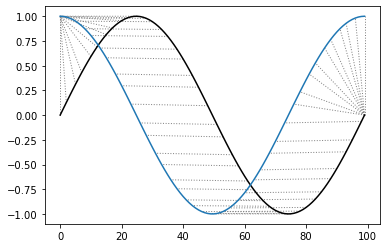

거리:27.26756800768756


In [342]:
# 같은 길이의 sin,cos
dtw.dtw(q1,q2,keep_internals=True).plot(type="twoway")
print(f'거리:{dtw.dtw(q1,q2,keep_internals=True).distance}')

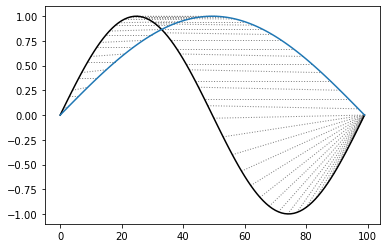

거리:32.52502131040423


In [343]:
# 다른 길이의 sin,sin (다른길이 비교가능)
dtw.dtw(q1,q3,keep_internals=True).plot(type="twoway")
print(f'거리:{dtw.dtw(q1,q3,keep_internals=True).distance}')

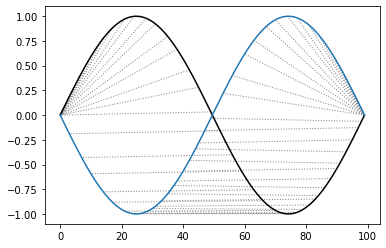

거리:65.00369703277995


In [344]:
# 같은범위의 sin, -sin (비슷한 패턴같아보이지만 정반대)
dtw.dtw(q1,q4,keep_internals=True).plot(type="twoway")
print(f'거리:{dtw.dtw(q1,q4,keep_internals=True).distance}')

---
## 2.Frechet distance
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611432-656bc8b6-aedd-4931-b50b-59fe99175175.png" width="400px" height="400px">
<br/> 
- 유래 : 수학에서 곡선을 따라 점의 위치와 순서를 고려한 곡선 간의 유사도를 측정 한 것. '모리스 르네 프레셰'의 이름을 따서 명명됨  


- 정의 :
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611440-3890f04f-5945-4b66-baa3-a89d59aac388.JPG" width="500px" height="500px">
<br/>

- 변수 :
  - d:거리함수 
  - t : 0~1의 실수범위에서 궤적 A,B를 모든 시점으로 연속 단조증가시키며 전사함(surjection)  
  - α,β : t의 재매개 함수(표준화된 시간 변수)
  - A(α(t)),B(β(t)) : 궤적 A,B에서 시점 α(t),β(t) 에서의 지점

<br/>

- 설명 : 전사된 시점(t)마다 두 궤적 A,B의 지점 간 거리를 함수 d로 측정, 궤적 A,B별로 각각 α,β가 주어지고 α,β가 단조증가 함수라는 특성을 이용함  
<br/>

- 예시 : 주인과 산책하는 개의 목줄

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611445-a06a42f6-a227-4ee1-9b09-e434468330fb.JPG" width="500px" height="500px">
<br/>

- 목줄로 묶인 개와 같이 산책을 하는 주인의 예시
- 가정: 주인과 개는 서로 다른 속도로 이동가능 하지만 왔던 길을 되돌아 갈 수 는 없음
- 산책하는 동안 주인과 개 사이의 목줄은 목줄이 허용 하는 길이 범위 안에서 서로 다른 궤적을 그리며 이동함
- 이 때, 두 궤적을 그리는 산책이 가능한 최소한의 목줄 길이가 ※프레셰 거리※


<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611447-f5ab76a4-c32a-4661-bd5e-038361a06853.JPG" width="500px" height="500px">
<br/>

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611453-2bab767e-2ee4-42b2-b5ad-81e68a8aa160.JPG" width="500px" height="500px">
<br/>

- 시점 t를 특정 α,β함수로 재매개한 시점에 의해 매칭되는 두 궤적 A,B상의 지점들마다 거리를 측정하고, 이 중 최대값을 찾는 과정을 모든 가능한 α,β마다 수행했을 때 그 최대값들 중 inf값이 프레셰 거리  
- 다른 관점에서는, 두 궤적 A,B에서 매칭된 지점마다의 거리들 중 최댓값이 INF값이 될 수 있도록 시점(t)을 재매개 하는 특정 α,β를 찾아가는 과정이라고도 볼 수 있음

##  특징
- 하우스 도르프 거리와 다르게 두 궤적의 진행방향이나 모양을 고려하여 계산하기에, 값이 작을 수록 두 궤적은 가갑고 모양도 비슷한 유사궤적이라고 판단가능(논문서론에서 제기한 개선점)  
- 이는 정의에서 단조증가함수인 α,β 가 사용되어 거리의 하한값을 찾는 다는 특성 때문에 두 궤적의 진행방향과 형태에 따른 유사성이 자연스럽게 반영되고 이 특성으로 유사성 지표로 적절하게 활용될 수 있음

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611457-4168cee0-46ab-41d0-b44b-bef538de565c.jpg" width="500px" height="500px">
<br/>

- 위의 예시에서 직관적으로 목줄이 짧을 수록 주인과 개의 산책 이동 궤적은 비슷해 질 수 밖에 없음을 알 수 있음

## 활용

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611461-5886aadf-bef6-4fbb-8b8e-2e5214f7b39c.JPG" width="500px" height="500px">
<br/>

- GAN을 사용한 모델에서 평가지표로 frechet distance를 활용
- Frechet Inception distance(FID)는 GAN모델에서 생성자 및 판정자 사이의 거리를 측정하는 Inception score에서 측정하는 기준으로 사용되며 이는 유사도의 판단기준으로 작을수록 품질이 좋음

---
## 3.Discrete Frechet Distance
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611641-8d2de38a-3342-4d84-b02a-f1f06bb342f5.png" width="400px" height="400px">
<br/>

# <center>↓<center/>

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611648-2e414b26-dbba-41cd-8dcf-96258d710ae2.jpg" width="500px" height="500px">
<br/>
- 유래 : 일반적인 Frechet Distance는 엄밀히는 연속적인 궤적에 적용되는 것으로, 궤적의 양이나 점의 개수가 많을경우 계산이 복잡하다. 따라서, 현실 데이터에 적용이 용이한 이산 프레셰 거리가 널리쓰인다.  

<br/>

- 정의 : Frechet Distance 에서의 근사

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611654-d689370a-53ad-406a-8518-5303079eb3ad.JPG" width="800px" height="800px">
<br/>

- 변수 :
  - P,Q : 궤적
  - u,v : vertices  

<br/>

- 설명 : 
 - 점들의 진행방향을 고려한 점들의 순서집합에서 궤적 P,Q를 커플링한 pair들로 부터 거리를 측정함  
 - Coupling(커플링) : 두 궤적 간에 거리를 측정할 꼭짓점 끼리 쌍을 맺는 것
 
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611657-68854dc7-6bb7-44ec-9acc-c84bb5877d31.JPG" width="400px" height="400px">
<br/>

# <center>↓<center/>

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611659-ae646340-a151-45c6-ba54-c04d22f28b62.JPG" width="400px" height="400px">
<br/>
    
    
 - Couplig length(커플링 길이) : 커플링 한 쌍 끼리의 거리
 - 커플링은 어느 한쪽 궤적이나 양 쪽 궤적 모두에서 한 칸씩 이동해가며 맺을 수 있지만 뒤로 돌아가거나 한 번에 두 칸 이상 이동할 수 없음
 - 이러한 커플링을 통해 커플링 길이를 최소화하며 마지막 까지 이동했을 때 가장 길었던 커플링 길이가 Discrete Frechet Distance 

- 예시 : 끈으로 묶여있는 징검다리 위 개구리 한 쌍

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611716-94e343a1-ff5e-451a-bf8d-1993b00c5ca7.jpg" width="500px" height="500px">
<br/>
    
# <center>↓<center/>
    
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611722-b186e612-1d52-4b2b-a46e-f022e603e899.jpg" width="500px" height="500px">
<br/>    

- 끈으로 묶여있는 두 개구리가 각자 징검다리에 놓여있음  
- 두 개구리는 한번에 한 칸 이동 또는 이동하지 않을 수 있지만, 뒤로 돌아갈 순 없음
- 위의 정의에서 두 개구리의 매 순간 위치의 쌍이 '커플링', 끈 길이가 '커플링 길이'
- 끈의 길이를 최소화 하면서 징검다리의 끝까지 이동했을때, 가장 길었던 길이가 ※discrete frechet distance※
 
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611732-96aff525-f8b7-4891-a2b5-dc35d403dc07.JPG" width="800px" height="800px">
<br/>
    
- 위의 정의에서 궤적 P,Q는 각 징검다리
- vertices u,v는 징검다리 돌
- paris는 끈으로 묶여있는 개구리들의 이동궤적상의 좌표

## 특징
- 관측시점이 일치하지 않아도 계산이 가능하기에, 임상분야와 같이 표본들 간 관측시점을 철저히 통제하기 어려운 분석환경에서도 굉장히 유용할 수 있음

---
## 4.Frechet Distance vs Discrete Frechet Distance

- 기본적인 계산원리는 동일함
- 프레셰 거리는 궤적의 전체구간을 계산하는 반면, 이산 프레셰 거리는 궤적의 전체 구간이 아닌 실제로 관측치가 있는 궤적의 꼭짓점 끼리의 거리만 측정한다는 점에서 차이가 있음

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611770-666d2666-f2fd-41f9-b2c5-e7c6589679a3.JPG" width="800px" height="800px">
<br/>

- 그럼에도, 이산 프레셰 거리는 연속 프레셰 거리에 충분히 근사하는 것으로 알려져 있음

---
### Time Complexity

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611772-8480ba60-a690-46c7-aa82-f0fd5bad39c1.jpg" width="1000px" height="1000px">
<br/>

<center>--> 논문 본문에서 시간복잡도 및 알고리즘 계산<center/> 
    
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611777-f1d5c5f0-eabc-472a-a952-d26aba01a1ec.JPG" width="1000px" height="1000px">
<br/>
    
<center>해당 논문에서는 프레셰 거리에 대한 시간복잡도를 줄이기위해 정확한 값이 아닌 근사를 통한 휴리스틱 알고리즘 제안<center/>    
    
   

---
### (2021.11.24 진행)
## Distance 사이의 비교


- 참고 
  - R로 구현 가능하지만, 파이썬으로 구현  
  - 논문의 성능비교 표 있지만 노테이션이 복잡하므로 실제로 구현  
  - 교수님들이 주신 피드백 으로 시간측정 및 실제 구현  
  - 라이브러리에 input 맞추기 위해 data의 structure 변형 (series,dataframe,numpy)

### Recap 
#### Hausdorff distance
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611800-b95ab845-6939-47e9-9c83-0819808a0fbc.JPG" width="400px" height="400px">
<br/> 

##### 한쪽 점 집합을 기준으로 다른쪽 집합 상의 점까지의 가장 먼 거리를 구함. 그리고 두 거리중 더 큰 것을 distance로 정함.

#### ED(Euclidean Distance) vs DTW(Dymamic Time Warping)
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611802-812c6df6-524d-458d-be1d-a7e85791ea3d.png" width="500px" height="500px">
<br/>

##### Euclidean Distance
- 장점 : 계산이 쉬움,직관적으로 이해 , 연산속도가 빠름
- 단점 : 신호의 떨림과 움직임이 심해질수록 결과가 어긋나는 현상 발생 , ※길이가 다른 시계열 분석 불가※

##### DTW(Dynamic Time Warping)
- 장점: ※서로 다른 길이의 시계열도 유사도 분석가능※ , GPS 데이터 등 다차원 시계열 데이터의 분석 가능  
- 단점 : 알고리즘 구현이 어렵고 연산량이 많음  

#### Frechet Distance
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611905-1f46fb47-12f8-4197-961f-f0f1756ba755.JPG" width="500px" height="500px">
<br/>

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611816-a4770380-dac5-4121-840a-7a74a9789005.JPG" width="500px" height="500px">
<br/>

##### Discrete Frechet Distance

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611824-dcd03b00-4fed-4e5a-8037-3d1804149442.JPG" width="800px" height="800px">
<br/>

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611827-681141a5-6d71-4234-9041-c28a2f36422d.jpg" width="500px" height="500px">
<br/>
    
# <center>↓<center/>
    
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611833-979334dc-100f-48d5-93b4-584914e2e7f0.jpg" width="500px" height="500px">
<br/>   


---
## Time Complexity    

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611857-d02a4562-3fc2-438c-8b5b-53d64bcabc38.JPG" width="800px" height="800px">
<br/>

# <center>↓<center/>

    
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611860-e4b3c545-5a67-4a0b-b31d-16f874cc244a.JPG" width="800px" height="800px">
<br/>

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611866-9ee08373-7cf4-456f-a799-ff53a2bbe221.jpg" width="1000px" height="1000px">
<br/>

# <center> Hausdorff Distance <center/>
    
    
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611877-dc701ef0-68c0-488f-aff3-bea9844178a9.jpg" width="1000px" height="1000px">
<br/>    

# 라이브러리

In [430]:
import time
import math
import numpy
import pandas as pd

import frechetdist                                      # Discrete Frechet Distance
from frechetdist import frdist                           
import similaritymeasures                               # Frechet Distance
import dtw                                              # DTW
from dtw import *
from scipy.spatial import distance                      # Euclidean Distance
from scipy.spatial.distance import directed_hausdorff   # Hausdorff Distance

## 라이브러리 링크
[Frechet Distance](https://pypi.org/project/similaritymeasures/)  
[Dynamic Time Warping](https://pypi.org/project/dtw-python/)  
[Discrete Frechet Distance](https://pypi.org/project/frechetdist/)  
[Euclidean Distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html)  
[Hausdorff Distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.directed_hausdorff.html)

# 데이터 : 2009년 서울의 기상

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611990-ca63549c-8fd2-406b-83af-af14b9f8c251.JPG" width="800px" height="800px">
<br/>

### 2009-01-01-00시 ~ 2009-12-31-24시 
### 1시간마다  기온,강수량 ,풍속,풍향,습도 등등 측정

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149611994-40baf655-57f7-42b2-99f4-8655b8be6c98.JPG" width="500px" height="500px">
<br/>

### 2009-01-01-00시 ~ 2009-02-28-24시 
### 시계열 데이터 분석을 위해 1월vs2월의 기온(1차원 데이터) 비교

In [346]:
#시간 측정
start = time.time()                    # 시작 시간 저장
 
math.factorial(100000)

print("time :", time.time() - start)   # 최종시간 - 시작시간

time : 0.3420853614807129


In [347]:
climate=pd.read_csv(r"climate.csv")
jan=climate[:747]                             #1월
feb=climate[747:1419]                         #2월

In [348]:
jan.head()

,date,Temp
0,2009-01-01 0:00,-7.6
1,2009-01-01 1:00,-7.8
2,2009-01-01 2:00,-8.1
3,2009-01-01 3:00,-8.5
4,2009-01-01 4:00,-8.8


In [349]:
feb.head()

,date,Temp
747,2009-02-01 0:00,3.8
748,2009-02-01 1:00,3.5
749,2009-02-01 2:00,3.1
750,2009-02-01 3:00,2.1
751,2009-02-01 4:00,2.1


In [350]:
# 결측치 존재하므로 제거
jan=jan.dropna(axis=0)
feb=feb.dropna(axis=0)
# index 동일하게 정렬
feb=feb.reset_index()
feb=feb.drop(columns=["index"])
jan=jan["Temp"]
feb=feb["Temp"]

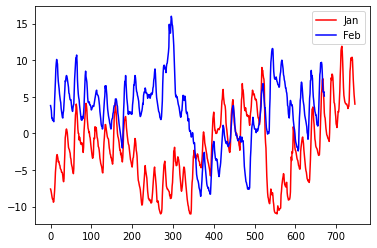

In [351]:
plt.plot(jan,color='r',label="Jan")
plt.plot(feb,color='b',label="Feb")
plt.legend()
plt.show()

### 1월의 기온이 상대적으로 낮고, 일수가 1월이 더 길기에 데이터 길이가 다름

In [352]:
print(f'1월의 길이 : {len(jan)} =24 x 31, 2월의 길이 : {len(feb)} = 24 x 28')

1월의 길이 : 744 =24 x 31, 2월의 길이 : 672 = 24 x 28


# 1월의 데이터 개수를 2월에 맞게 수정

In [353]:
jan_eq=jan[:len(feb)]

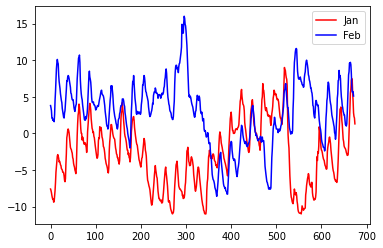

In [354]:
plt.plot(jan_eq,color='r',label="Jan")
plt.plot(feb,color='b',label="Feb")
plt.legend()
plt.show()

# Eulcidean Distance

In [355]:
distance.euclidean(jan,feb)

ValueError: operands could not be broadcast together with shapes (744,) (672,) 

In [356]:
start = time.time()          
print(f'Euclidean Distance : {distance.euclidean(jan_eq,feb)}')
print(f'실행시간 : {time.time() - start}')

Euclidean Distance : 229.9989782586001
실행시간 : 0.0009965896606445312


- 장점 : 계산이 쉬움,직관적으로 이해 , 연산속도가 빠름  
- 단점 : 신호의 떨림과 움직임이 심해질수록 결과가 어긋나는 현상 발생 ※길이가 다른 시계열 분석 불가※

# Hausdorff Distance

In [357]:
directed_hausdorff(jan, feb)

IndexError: tuple index out of range

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612016-9f196b79-b58b-48df-9533-0db3166554ff.jpg" width="500px" height="500px">
<br/>

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612019-ac69b536-81ac-45e7-893b-c33be320af7f.JPG" width="500px" height="500px">
<br/>

In [358]:
type(jan)

pandas.core.series.Series

In [359]:
jan1=pd.Series.to_frame(jan)
feb1=pd.Series.to_frame(feb)
jan1=jan1.reset_index()
feb1=feb1.reset_index()
jan1.head()

,index,Temp
0,0,-7.6
1,1,-7.8
2,2,-8.1
3,3,-8.5
4,4,-8.8


In [360]:
directed_hausdorff(jan1,feb1)

(75.00806623290592, 743, 671)

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612074-4d30ee09-2520-46cd-9564-a71bcfcd4f85.JPG" width="600px" height="600px">
<br/>

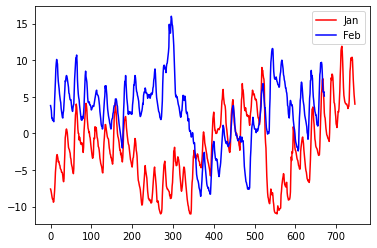

In [361]:
plt.plot(jan,color='r',label="Jan")
plt.plot(feb,color='b',label="Feb")
plt.legend()
plt.show()

## 데이터 개수를 맞추지않고 적용하면 출력은 되지만, 기온이 아닌 날짜별 차이가 적용됨
## sqrt((743번째 -  671 번째)^2 + (743번째 데이터의 기온 - 671번째 데이터의 기온)^2) = 75

In [362]:
jan1_eq=jan1[:672]

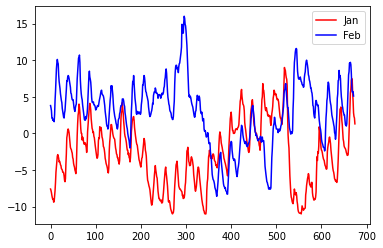

In [363]:
plt.plot(jan_eq,color='r',label="Jan")
plt.plot(feb,color='b',label="Feb")
plt.legend()
plt.show()

In [364]:
#Hausdorff Distance
start = time.time()    
ans=directed_hausdorff(jan1_eq,feb1)
print(f'Hausdorff Distance : {ans[0]}')
print(f'Index : {ans[1:]}')
print(f'실행시간 : {time.time() - start}')

Hausdorff Distance : 19.05885620912231
Index : (292, 283)
실행시간 : 0.006016969680786133


In [365]:
x=292-283
y=jan1_eq["Temp"][292]-feb1["Temp"][283]

print(f'좌표값 계산 : {np.sqrt(x**2+y**2)}')

좌표값 계산 : 19.05885620912231


# DTW

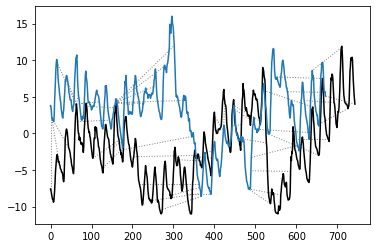

거리:1991.0999999999997
실행시간 : 0.35205769538879395


In [366]:
start = time.time()

dtw.dtw(jan,feb,keep_internals=True).plot(type="twoway")

print(f'거리:{dtw.dtw(jan,feb,keep_internals=True).distance}')
print(f'실행시간 : {time.time() - start}')

- 장점 : 서로 다른 길이의 시계열 데이터 분석가능  
- 단점 : 알고리즘 구현이 어렵고 연산량이 많기에 시간이 제일 오래 걸림(plot이 포함된 시간 -> plot제외하면 0.05(ED와 HD의 10배)

# 다차원 데이터 

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612104-a00ef28a-c54a-4381-88e4-1233b6c0e52c.JPG" width="800px" height="800px">
<br/>

### 2009-01-01-00시 ~ 2009-12-31-24시 
### 1시간마다  기온,강수량 ,풍속,풍향,습도 등등 측정

In [367]:
climate_multi=pd.read_csv(r"climate_multi.csv")

In [368]:
climate_multi.head()

,date,temp,Unnamed: 2,wind_power,wind_direction,moisture
0,2009-01-01 0:00,-7.6,NaN,2.1,290.0,55.0
1,2009-01-01 1:00,-7.8,NaN,2.3,320.0,54.0
2,2009-01-01 2:00,-8.1,NaN,2.0,340.0,52.0
3,2009-01-01 3:00,-8.5,NaN,2.4,290.0,52.0
4,2009-01-01 4:00,-8.8,NaN,2.1,320.0,53.0


### 2009-01-01-00시 ~ 2009-02-28-24시 
### 다차원 시계열 데이터 분석을 위해 1월vs2월의 기온,풍량,풍속,습도(4차원 데이터) 비교

In [369]:
climate_multi=climate_multi.drop(columns=["Unnamed: 2"])

In [370]:
jan_multi=climate_multi[:747]
feb_multi=climate_multi[747:1419]
jan_multi=jan_multi.dropna(axis=0)
feb_multi=feb_multi.dropna(axis=0)
feb_multi=feb_multi.reset_index()
jan_multi=jan_multi.drop(columns=["date"])
feb_multi=feb_multi.drop(columns=["date","index"])

In [371]:
jan_multi.head()

,temp,wind_power,wind_direction,moisture
0,-7.6,2.1,290.0,55.0
1,-7.8,2.3,320.0,54.0
2,-8.1,2.0,340.0,52.0
3,-8.5,2.4,290.0,52.0
4,-8.8,2.1,320.0,53.0


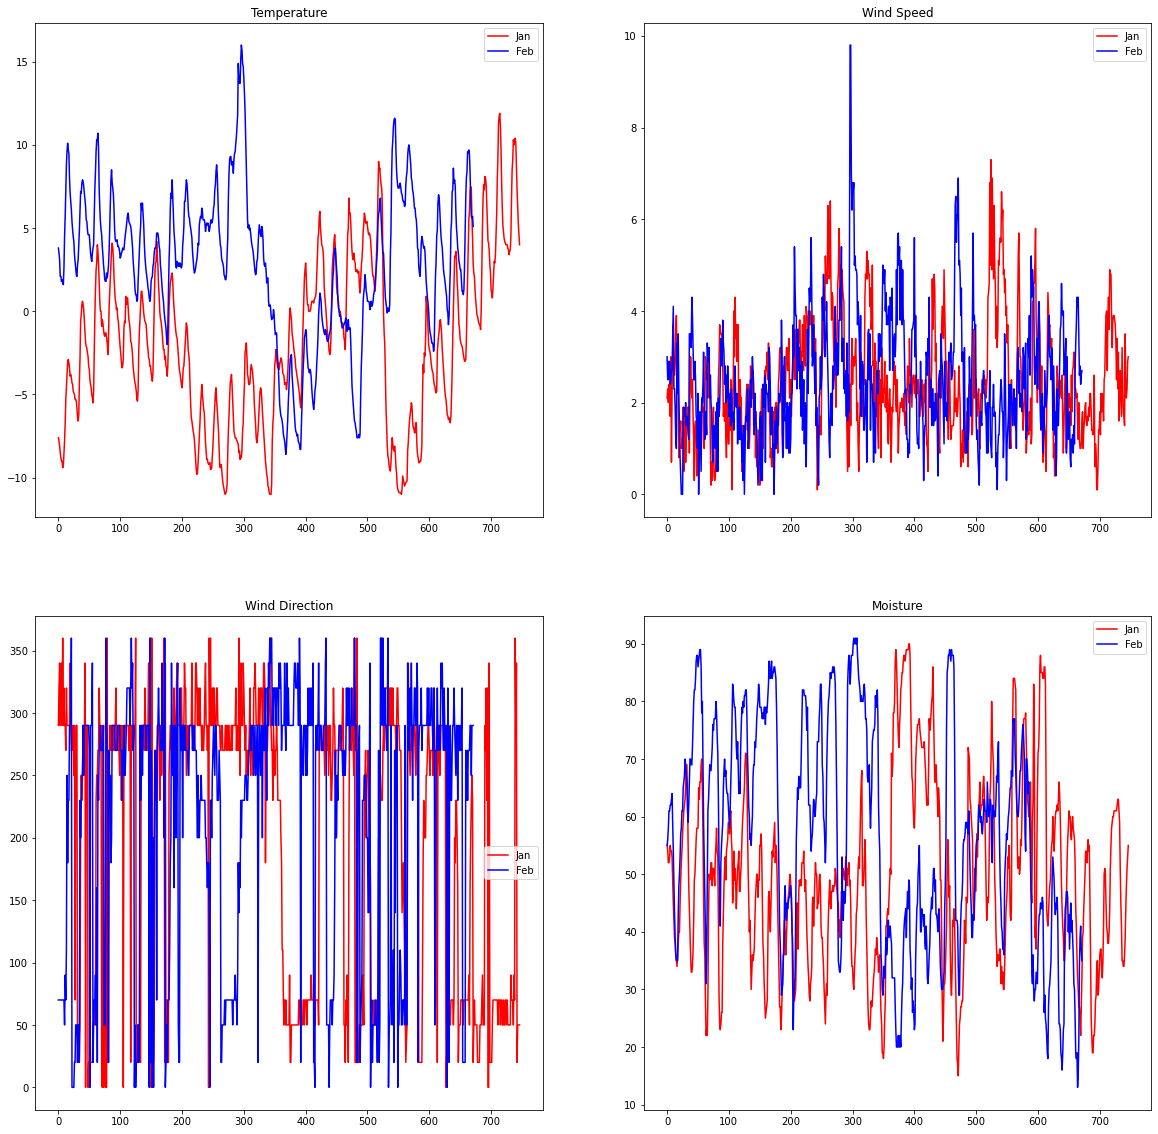

In [372]:
fig,ax=plt.subplots(
2, 2 , figsize=(20,20))

ax[0,0].plot(jan_multi["temp"],color='r')
ax[0,0].plot(feb_multi["temp"],color='b')
ax[0,0].legend(["Jan","Feb"])

ax[0,1].plot(jan_multi["wind_power"],color='r')
ax[0,1].plot(feb_multi["wind_power"],color='b')
ax[0,1].legend(["Jan","Feb"])

ax[1,0].plot(jan_multi["wind_direction"],color='r')
ax[1,0].plot(feb_multi["wind_direction"],color='b')
ax[1,0].legend(["Jan","Feb"])

ax[1,1].plot(jan_multi["moisture"],color='r')
ax[1,1].plot(feb_multi["moisture"],color='b')
ax[1,1].legend(["Jan","Feb"])

ax[0, 0].set_title("Temperature")
ax[0, 1].set_title("Wind Speed")
ax[1, 0].set_title("Wind Direction")
ax[1, 1].set_title("Moisture")


plt.show()

# 변수 별 DTW

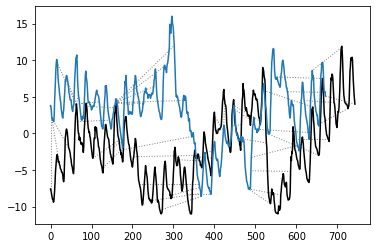

기온 DTW:1991.0999999999997


In [373]:
dtw.dtw(jan_multi["temp"],feb_multi["temp"],keep_internals=True).plot(type="twoway")
print(f'기온 DTW:{dtw.dtw(jan_multi["temp"],feb_multi["temp"],keep_internals=True).distance}')

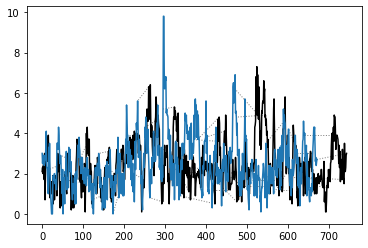

풍속 DTW:477.9


In [374]:
dtw.dtw(jan_multi["wind_power"],feb_multi["wind_power"],keep_internals=True).plot(type="twoway")
print(f'풍속 DTW:{dtw.dtw(jan_multi["wind_power"],feb_multi["wind_power"],keep_internals=True).distance}')

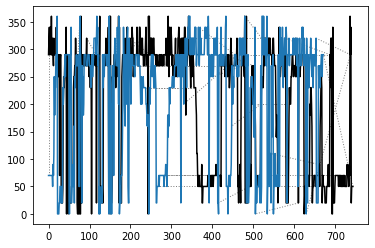

풍향 DTW:30930.0


In [375]:
dtw.dtw(jan_multi["wind_direction"],feb_multi["wind_direction"],keep_internals=True).plot(type="twoway")
print(f'풍향 DTW:{dtw.dtw(jan_multi["wind_direction"],feb_multi["wind_direction"],keep_internals=True).distance}')

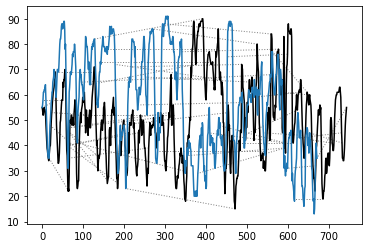

습도 DTW:6274.0


In [376]:
dtw.dtw(jan_multi["moisture"],feb_multi["moisture"],keep_internals=True).plot(type="twoway")
print(f'습도 DTW:{dtw.dtw(jan_multi["moisture"],feb_multi["moisture"],keep_internals=True).distance}')

# 다차원 DTW

In [377]:
start = time.time()

print(f'거리:{dtw.dtw(jan_multi,feb_multi,keep_internals=True).distance}')
print(f'실행시간 : {time.time() - start}')

거리:47375.732863482015
실행시간 : 0.07080793380737305


- 1991 + 478 + 30930 + 6274 ≠ 47375  
- DTW는 길이가 서로 다른 데이터에서 적절한 index를 매칭시켜 거리를 계산(한 점을 기준으로 Eulidean Distance가 최소가 되는 포인트 매칭)  
- 따라서, Eulidean Distance의 정의에서 루트 안에 값이 들어가므로, 누적합과는 값이 다름


# Frechet Distance

In [378]:
jan_fd=pd.Series.to_numpy(jan)      

jan_eq_fd=pd.Series.to_numpy(jan_eq)
feb_fd=pd.Series.to_numpy(feb)

ans_another=similaritymeasures.frechet_dist(jan_fd,feb_fd)

In [379]:
start = time.time()
fd_ans=similaritymeasures.frechet_dist(jan_eq_fd,feb_fd)

print(f'Frechet Distance:{fd_ans}')
print(f'Frechet Distance(같은 길이):{ans_another}')
print(f'실행시간 : {time.time() - start}')

Frechet Distance:11.399999999999999
Frechet Distance(같은 길이):11.399999999999999
실행시간 : 12.808740139007568


- 1월과 2월의 데이터 길이를 다르게 해도, 길이가 같은 것과 같은 값  
- Frechet Distance의 정의에서 길이가 달라도 연산이 가능하지만 길이가 다른 인덱스는 의미없는 값이라 길이는 같음

# Discrete Frechet Distance

In [380]:
jan_dfd=climate[:747]                             
feb_dfd=climate[747:1419] 
jan_dfd=jan_dfd.dropna(axis=0)
feb_dfd=feb_dfd.dropna(axis=0)
feb_dfd=feb_dfd.reset_index()
jan_dfd=jan_dfd.drop(columns=["date"])
feb_dfd=feb_dfd.drop(columns=["index","date"])
jan_dfd_eq=jan_dfd[:len(feb_dfd)]

In [381]:
start = time.time()
dfd_ans=frdist(jan_dfd_eq,feb_dfd)

print(f'Discrete Frechet Distance:{dfd_ans}')
print(f'실행시간 : {time.time() - start}')

Discrete Frechet Distance:11.399999999999999
실행시간 : 7.787168502807617


- 기본적인 계산원리는 동일  
- 프레셰 거리는 궤적의 전체구간을 계산하는 반면, 이산 프레셰 거리는 궤적의 전체 구간이 아닌 실제로 관측치가 있는 궤적의 꼭짓점 끼리의 거리만 측정한다는 점에서 차이가 있음  
- 그럼에도 이산 프레셰 거리는 연속 프레셰 거리에 충분히 근사하는 것으로 알려져 있음  
- 결과에선 값의 차이가 없음, 라이브러리 마다 알고리즘의 시간이 다르겠지만 DFD가 확실히 빠름


---
### (2021.12.08 진행)
### Recap

- Distance 사이의 비교  
- 1차원 vs 4차원  
- 거리 별 실행시간 및 시각화

### Computing DTW

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612137-d46bf306-3ce9-4ae1-8fad-2c1a6eee0dd7.JPG" width="500px" height="500px">
<br/>

- 알고리즘 수업때 배운 Dynamic Programming의 방법 -> 위에서의 단점(알고리즘 구현이 어렵고 연산량이 많음)  
- 길이가 서로 다르므로, 적절한 index를 매칭시켜 distance 계산(한 점을 기준으로 euclidean distance가 최소가 되는 포인트를 매칭)

# <center>↓<center/>
    
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612140-daf5a793-612f-4d7b-a613-b15df1ae2a92.jpg" width="500px" height="500px">
<br/>
    
# <center>↓<center/>
    
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612144-733d8e01-89b9-497c-a922-c18db8da23cd.JPG" width="500px" height="500px">
<br/>

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612147-0e5d5e43-3796-4583-86c9-dd3c57cd02dc.jpg" width="500px" height="500px">
<br/>
    
    
# <center>↓<center/>
    
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612151-6183aadd-fd81-4ad0-bc16-298fcb24202c.png" width="500px" height="500px">
<br/>

# <center>↓<center/>
    
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612160-2d757fb8-60ef-4f43-817b-3ffe798115e7.png" width="500px" height="500px">
<br/>

# <center>↓<center/>
    
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612156-9cb2aac1-6e28-4676-be57-d608c2fd733e.png" width="800px" height="800px">
<br/>
    
# <center>↓<center/>
    
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612158-9f597382-d2bf-4233-823d-c0ea6a8ba1dd.png" width="800px" height="800px">
<br/>
    
# <center>↓<center/>
    
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612159-74593bcd-66be-49cf-88d5-21a10f9d80bb.png" width="800px" height="800px">
<br/>
    
## <center> 경로를 따라 align <center/>
## <center> DTW 값은 15 <center/>

### 실행시간 

In [263]:
jan_1d=jan_multi['temp']
feb_1d=feb_multi['temp']

In [265]:
start = time.time()
print(f'다변량 dtw 거리:{dtw.dtw(jan_multi,feb_multi,keep_internals=True).distance}')
print(f'다변량 dtw 실행시간 : {time.time() - start}')

다변량 dtw 거리:47375.732863482015
다변량 dtw 실행시간 : 0.074798583984375


In [272]:
start = time.time()
print(f'일차원 dtw 거리:{dtw.dtw(jan_1d,feb_1d,keep_internals=True).distance}')
print(f'일차원 dtw 실행시간 : {time.time() - start}')

일차원 dtw 거리:1991.0999999999997
일차원 dtw 실행시간 : 0.0498661994934082


### 데이터개수 3000개씩

In [273]:
cli_mul=pd.read_csv(r"climate_multi.csv")
cli_mul=cli_mul.drop(columns=["Unnamed: 2"])
cli_mul=cli_mul.drop(columns=["date"])
first_cli=cli_mul[:3000]  
second_cli=cli_mul[3001:6000]    
first_cli=first_cli.dropna(axis=0)
second_cli=second_cli.dropna(axis=0)
second_cli=second_cli.reset_index()
second_cli=second_cli.drop(columns=["index"])

first_cli_1d=first_cli["temp"]
second_cli_1d=second_cli["temp"]

In [289]:
start = time.time()
print(f'다변량 dtw 거리:{dtw.dtw(first_cli,second_cli,keep_internals=True).distance}')
print(f'다변량 dtw 실행시간 : {time.time() - start}')

다변량 dtw 거리:235571.64222971737
다변량 dtw 실행시간 : 0.8407511711120605


In [287]:
start = time.time()
print(f'일차원 dtw 거리:{dtw.dtw(first_cli_1d,second_cli_1d,keep_internals=True).distance}')
print(f'일차원 dtw 실행시간 : {time.time() - start}')

일차원 dtw 거리:30509.29999999997
일차원 dtw 실행시간 : 0.7659947872161865


### 다차원 데이터 시각화

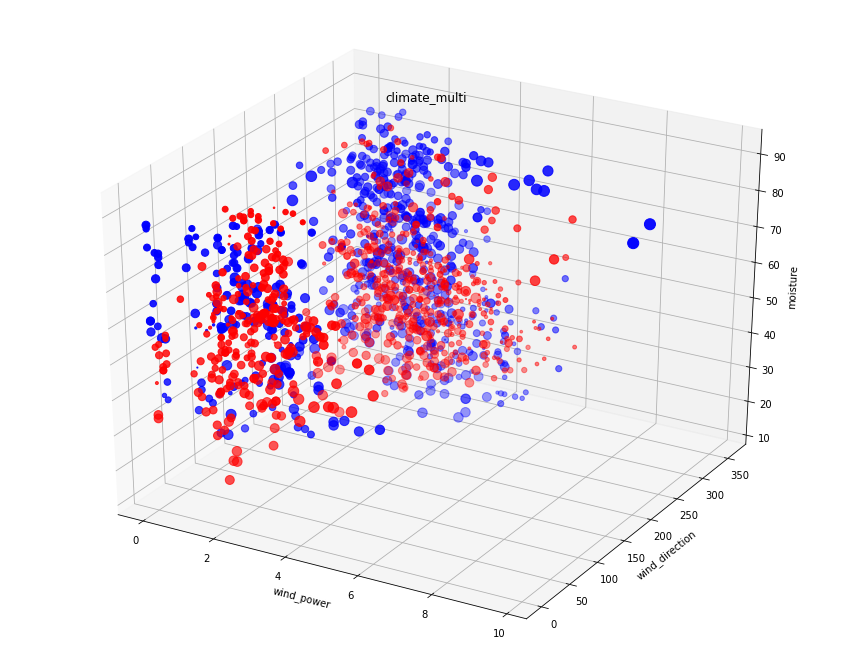

In [320]:
x=jan_multi["wind_power"]
y=jan_multi["wind_direction"]
z=jan_multi["moisture"]
s=jan_multi["temp"]

xx=feb_multi["wind_power"]
yy=feb_multi["wind_direction"]
zz=feb_multi["moisture"]
ss=feb_multi["temp"]

fig=plt.figure(figsize=(15,12))
ax=plt.axes(projection='3d')
ax.scatter3D(x,y,z,s=5*(s-np.min(s)),c='red')
ax.set_xlabel('wind_power')
ax.set_ylabel('wind_direction')
ax.set_zlabel('moisture')
ax.set_title("climate_multi")

ax.scatter3D(xx,yy,zz,s=5*(ss-np.min(ss)),c='blue')
ax.set_xlabel('wind_power')
ax.set_ylabel('wind_direction')
ax.set_zlabel('moisture')
ax.set_title("climate_multi")

plt.show()

## DTW Plot Option
---
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612213-96aaa9ee-c556-42c3-8ea8-476dcb02801c.JPG" width="700px" height="700px">
<br/>

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612214-9cd3da5c-c760-4727-b975-b9dfdb33afd4.png" width="500px" height="500px">
<br/>

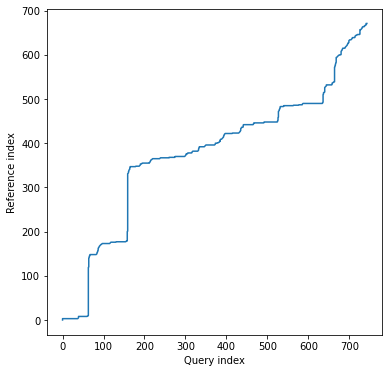

In [391]:
dtw.dtw(jan,feb,keep_internals=True).plot(type="alignment")

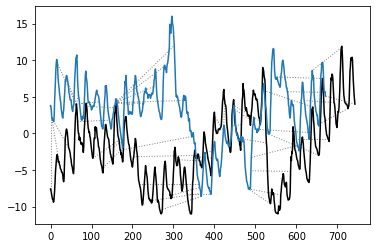

In [393]:
dtw.dtw(jan,feb,keep_internals=True).plot(type="twoway")

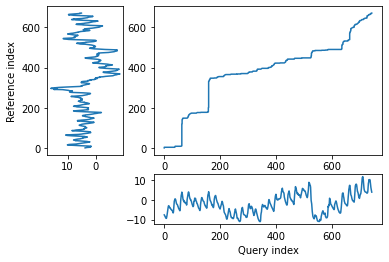

In [394]:
dtw.dtw(jan,feb,keep_internals=True).plot(type="threeway")

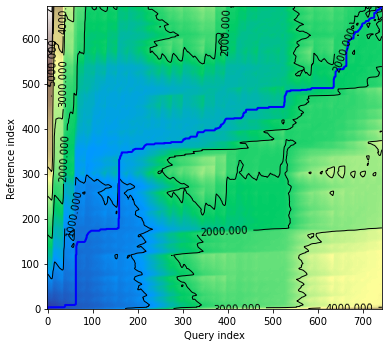

In [395]:
dtw.dtw(jan,feb,keep_internals=True).plot(type="density")

In [396]:
dtw.dtw(jan,feb,keep_internals=True).distance

1991.0999999999997

#### 4차원

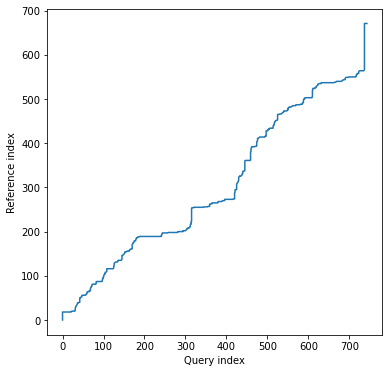

In [397]:
dtw.dtw(jan_multi,feb_multi,keep_internals=True).plot(type="alignment")

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 2) + inhomogeneous part.

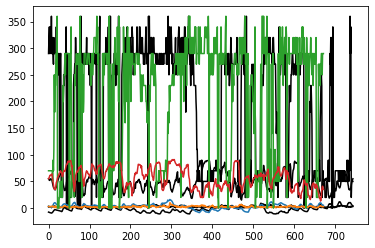

In [398]:
dtw.dtw(jan_multi,feb_multi,keep_internals=True).plot(type="twoway")

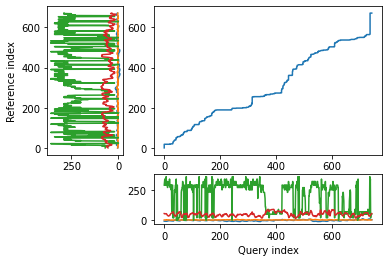

In [399]:
dtw.dtw(jan_multi,feb_multi,keep_internals=True).plot(type="threeway")

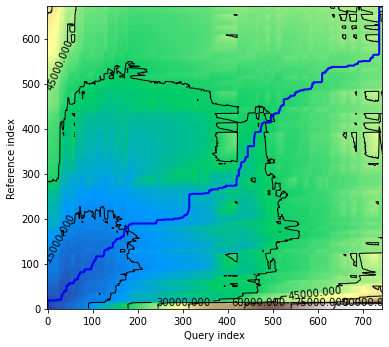

In [400]:
dtw.dtw(jan_multi,feb_multi,keep_internals=True).plot(type="density")

In [401]:
dtw.dtw(jan_multi,feb_multi,keep_internals=True).distance

47375.732863482015

## Multidimensional DTW

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612241-787aeffd-b9c9-4ce1-b433-ffd42906b717.png" width="500px" height="500px">
<br/>

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612247-9af034bf-5869-463a-9fa4-e3c8ecc006db.JPG" width="700px" height="700px">
<br/>

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612252-259a86ff-e4e9-40ef-91b6-85f1295ba2ba.jpg" width="500px" height="500px">
<br/>

In [467]:
jan_multi_restricted=jan_multi[:5]
feb_multi_restricted=feb_multi[:5]

In [465]:
jan_multi_restricted

,temp,wind_power,wind_direction,moisture
0,-7.6,2.1,290.0,55.0
1,-7.8,2.3,320.0,54.0
2,-8.1,2.0,340.0,52.0
3,-8.5,2.4,290.0,52.0
4,-8.8,2.1,320.0,53.0


In [469]:
feb_multi_restricted

,temp,wind_power,wind_direction,moisture
0,3.8,3.0,70.0,55.0
1,3.5,2.5,70.0,56.0
2,3.1,2.9,70.0,58.0
3,2.1,2.5,70.0,61.0
4,2.1,2.9,70.0,61.0


In [543]:
jmr=jan_multi_restricted.to_numpy()
fmr=feb_multi_restricted.to_numpy()

In [544]:
jmr

array([[ -7.6,   2.1, 290. ,  55. ],
       [ -7.8,   2.3, 320. ,  54. ],
       [ -8.1,   2. , 340. ,  52. ],
       [ -8.5,   2.4, 290. ,  52. ],
       [ -8.8,   2.1, 320. ,  53. ]])

In [545]:
fmr

array([[ 3.8,  3. , 70. , 55. ],
       [ 3.5,  2.5, 70. , 56. ],
       [ 3.1,  2.9, 70. , 58. ],
       [ 2.1,  2.5, 70. , 61. ],
       [ 2.1,  2.9, 70. , 61. ]])

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612271-e061bc4b-c181-434f-b075-2092726b9045.JPG" width="800px" height="800px">
<br/>

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612274-b5783215-3838-4055-b5ab-d84602d5749d.png" width="400px" height="400px">
<br/>

In [546]:
agn=dtw.dtw(jan_multi_restricted,feb_multi_restricted,keep_internals=True)

In [558]:
agn.localCostMatrix

array([[220.29700406, 220.28247774, 220.28193299, 220.29582384,
        220.29691328],
       [250.27195208, 250.26332132, 250.27019399, 250.29392721,
        250.29456646],
       [270.28061344, 270.27913349, 270.30029597, 270.34291187,
        270.34394759],
       [220.36481117, 220.36335902, 220.38786264, 220.43903919,
        220.43958356],
       [250.32692624, 250.32069431, 250.33427652, 250.36567257,
        250.36663116]])

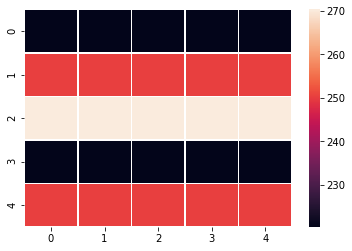

In [574]:
sns.heatmap(agn.localCostMatrix,linewidth=0.5)

In [547]:
agn.costMatrix

array([[ 220.29700406,  440.57948181,  660.86141479,  881.15723863,
        1101.45415191],
       [ 470.56895615,  690.84280313,  911.13160878, 1131.45116584,
        1351.74871837],
       [ 740.84956959,  961.12193662, 1181.43190475, 1401.79407772,
        1622.09266596],
       [ 961.21438075, 1181.48529564, 1401.81976739, 1622.23311691,
        1842.53224952],
       [1211.54130699, 1431.80598995, 1652.15404391, 1872.59878948,
        2092.89888068]])

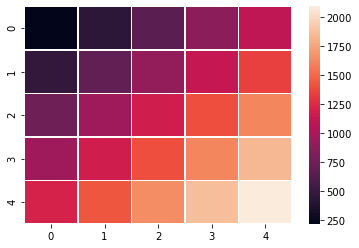

In [577]:
sns.heatmap(agn.costMatrix,linewidth=0.5)

In [484]:
dtw.dtw(jan_multi_restricted,feb_multi_restricted,keep_internals=True).distance

2092.8988806847055

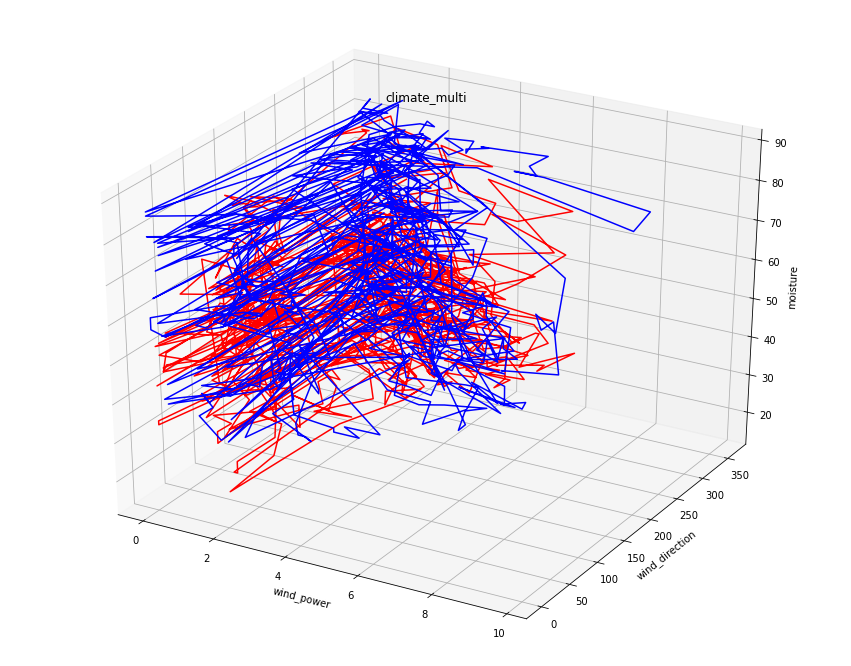

In [579]:
x=jan_multi["wind_power"]
y=jan_multi["wind_direction"]
z=jan_multi["moisture"]
s=jan_multi["temp"]

xx=feb_multi["wind_power"]
yy=feb_multi["wind_direction"]
zz=feb_multi["moisture"]
ss=feb_multi["temp"]

fig=plt.figure(figsize=(15,12))
ax=plt.axes(projection='3d')
ax.plot(x,y,z,c='red')
ax.set_xlabel('wind_power')
ax.set_ylabel('wind_direction')
ax.set_zlabel('moisture')
ax.set_title("climate_multi")

ax.plot(xx,yy,zz,c='blue')
ax.set_xlabel('wind_power')
ax.set_ylabel('wind_direction')
ax.set_zlabel('moisture')
ax.set_title("climate_multi")

plt.show()

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612293-fffbdc7f-47af-4f1d-9cbb-402b83ca7e74.JPG" width="800px" height="800px">
<br/>

---
### (2022.01.12 진행)
### Recap

- DTW 알고리즘 분석 및 예시를 통한 설명
- DTW 알고리즘 실행시간 분석 (일차원 vs 다차원)
- DTW 함수 옵션 및 시각화  
- 다차원 DTW 계산 알고리즘

<br/>
<img src="cptdtw5.png" width="500px" height="500px">
<br/>

---
### Intro

- Frechet Distance vs DTW
    - Time Complexity
    - Suitable Data
- 교수님 피드백 : 어떤 데이터에 어떤 기준이 적합한지?
    - 논문을 통한 탐색1
    - 논문을 통한 탐색2

## Time Complexity
- 코드의 실행시간은 코드의 알고리즘 별 다르지만, Frechet Distance가 더 오래 걸림

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612313-01505c75-a012-4e8a-bfac-ab2d4920b7e7.png" width="400px" height="400px">
<br/>



<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612345-53ee3e18-97c0-4851-976c-dce59bf523b5.jpg" width="400px" height="400px">
<br/>

- 위의 그림은 DTW로 표를 채우는 알고리즘 -> 두개의 시계열 데이터의 길이 만큼의 시간복잡도 O(nm)

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612350-d172de04-e2a8-422f-8bae-af5035d53c16.jpg" width="500px" height="500px">
<br/>

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612352-06871413-9391-42ff-8fd1-c16c541a0296.jpg" width="500px" height="500px">
<br/>

- Frechet Distance의 시간복잡도 -> O(nmlog(nm))

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612356-35c79921-58cb-417d-aaf8-afe6f62d3cb3.jpg" width="500px" height="500px">
<br/>

- Discrete Frechet Distance의 시간복잡도 -> O(nm)

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612363-57bd8b95-2ce3-4e9b-988b-b19e3941be3c.JPG" width="800px" height="800px">
<br/>

---
## Suitable Data

- DTW : 자동음성인식 ,전력패턴, 주식 데이터등의 시계열 데이터 
- Frechet Distance : FID(Frechet Inception Distance) , 패턴 매칭 등의 시계열 데이터

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612367-17cc14f7-b205-4b28-883d-55e9401a2c5b.JPG" width="700px" height="700px">
<br/>

- 위의 그림은 GAN 알고리즘에서 모델의 성능을 측정할 때, 생성한 데이터와 원래의 데이터를 분류하는 score를 합한 분포들끼리 비교하여 성능을 측정함 

#### 특징
- DTW : 모든 시간대를 비교하기 때문에 관계없는 시간대까지 알고리즘 결과에 반영될 수 있음. 즉 이상치에 대한 변화가 크기에, 제약조건이 후에 제시됨
- Frechet Distance : 궤적의 진행방향과 형태에 따른 유사성이 자연스럽게 반영되고 이 특성때문에 유사성 지표로 적절하게 활용될 수 있지만, 오래걸린다는 단점이 있음. 이 때문에 시간복잡도가 개선된 Discrete Frechet Distance가 제안됨(O(nm))

---
## 논문을 통한 탐색1

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612377-e88f3c98-5206-4080-b7a3-6d6b397bfb35.JPG" width="700px" height="700px">
<br/>

- 초록 : 궤적의 유사도를 측정하는 것은 중요한 문제이다. 이 논문에서는 LCSS(Longest common subsequence), Frechet Distance,DTW,Edit distance를 비교한다. R 패키지에 있으므로 해당 패키지를 사용하였고, 실제 궤적 데이터를 이용하여 4가지의 거리 기준 함수들을 비교할 것이다.

<br/>

- 서론 : 데이터의 양이 증가함에 따라, 대부분의 움직이는 데이터는 "타임 스탬프가 찍힌 위치 시퀀스"로 정의된다. 하지만 이러한 증가하는 궤적 데이터를 분석하기에는 어려움이 따르는데, 이는 대부분 동일한 연속 데이터가 무수히 많은 이산화된 궤적 표현을 가질 수 있기에 그렇다.따라서 궤적 분석에 중요한 것인 유사성 측정을 하기 위해서 장단점이 있는 척도를 비교한다."Similarity Measures" 패키지 안에 있는 각 척도들에 대한 설명 이후에, 실제 이동 데이터 셋들을 비교하여 유사도 값이 차이가 나는 위치를 강조할 것이다.

<br/>

- 본론1 : 궤적 유사도 측정에는 인덱싱이 가장 중요하다.해양 동물들의 궤적을 인덱싱 할때는 lcss 알고리즘을 적용하며,차량 및 보행자 교통 이동의 유사도 측정을 통해 교통관리를 하는 신호등 같은 도로 네트워크 타이밍을 조절함과 보안을 강화 할 수 있다. 프레셰 거리를이용하여 출근하는 사람들의 통근 패턴을 탐지할 수 있으며, 혼잡한 장면을 분석하며 경로를 계산 할 수 있다.또, 축구와 농구경기와 같은 스포츠 분야에서 DTW를 이용하여 움직임을 분석하여 코칭에 참고할 수 있다.  

<br/>

- 본론2 : 궤적의 길이는 개별 타임스탬프(점)의 수로 정의되며, 일반적으론 3차원까지지만 더 높은 차원의 궤적 유사도 비교도 가능하다. 유사도를 측정하는 것의 핵심은, 각 데이터들을 이산화 할때의 랜덤성이다. 예를 들어 ED는 점 쌍 사이의 거리의 합으로 정의되지만, 이는 이상치에 크게 좌우되며, 같은 길이를 요구한다. 이러한 문제들을 해결하기 위해 논문에서 제시하는 4가지 유사도 기준을 알아보며 효율성을 분석한다.

<br/>
 
- 본론3 :
    - 프레셰 거리 : 가장 많이 사용됨. DFD  및 Continuous 모두 가능하며, 각 점 쌍들이  다양하게 매칭될 수 있는 반면,궤적의 모든 점을 고려하기에 이상치에 영향을 크게 받는다.  
    - DTW : 프레셰 거리와 다르게, 궤적끼리 비교하여 일치하는 지점에 의존하는 방식. 다른 길이와 비교가 가능하지만, 각각의 점 쌍에서 최소 하나의 일치 지점이 있어야 하기에, DTW 또한 이상치에 크게 반응한다.
    - LCSS : DTW와 다르게 일부의 점 쌍이 매칭 되지 않아도 과정이 진행 될 수 있지만 그만큼 궤적 비교가 늘어난다.다양한 샘플링 안에서 잘 작동하지만,많은 부분이 일치하지 않은 경우 오차가 크게 생길 수 있다.
    - Edit distance : 기본 개념은 두 궤적을 동일하게 만드는데 필요한 최소한의 편집 횟수를 계산하는 것.

<br/>

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612382-f5fb0728-40f8-4ef5-bb2b-a8549367b88d.JPG" width="700px" height="700px">
<br/>

- 본론4 : 
    - 데이터 셋(위의 그림은 참고용) : 영국의 택배 드라이버의 궤적 데이터. 23400개의 분할된 궤적중 무작위로 선택된 50개의 궤적 쌍을 분석함.
    - 정규화 : 시작점과 끝점 정렬 하기위해 회전, 크기 조정 적용. 하지만 이러한 과정은 결과를 바꿀 수 있기에, 시작점과 끝점을 맞추기위해 거리값이 0이되는 점들을 추가하였음.
    - 비교 : 

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612389-2160d3a1-5fda-4772-a51f-3cdb26b2d823.JPG" width="600px" height="600px">
<br/>

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612399-3d8d0a58-1e59-47d2-9086-4f78d6067817.JPG" width="600px" height="600px">
<br/>

- 알고리즘을 구현하는 방식에 따라 상관관계값이 명확해짐.점들을 매칭하는 프레셰거리와 DTW는 높은 상관관계를 보이고, (알고리즘에서도 비슷하게 다뤘던 LCSS(최장부분공통수열)과 Edit Distance는 비슷한 방식으로 유사도를 측정하기에 비슷하고 따라서 높은 상관관계를 보인다.  

- (LCSS,Edit) , (Frechet, DTW) 쌍을 제외하고 , 예를들어 (Edit,DTW)의 비교는 낮은 상관관계를 보이는데, Edit distance의 경우는 유사도를 측정할 때, 궤적을 맞추기위해 길이를 변동시키고, 이로인해 DTW와 큰 차이를 보이고, 결과적으로 낮은 상관관계를 나타낸다.

- DTW와 프레셰 거리는 높은 상관관계를 보이지만, 이상치에 크게 반응하므로, 데이터셋에 따라 상관관계의 편차가 크게 나타날 수 있다.

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612412-4400005c-2306-402e-9095-46985a56bbd7.JPG" width="400px" height="400px">
<br/>

- 프레셰 거리의 대표적인 예인, 산책하는 개와 주인의 목줄의 관점에서 봐도, 중간의 높은 peak값은 프레셰거리에 크게 영향을 미치지만, dtw에는 큰 영향을 끼치지않는다.

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612419-a4c7a80f-c9e6-45cf-9469-275650b8c5b2.JPG" width="400px" height="400px">
<br/>

- 이상치 그래프와 다르게 위의 그림은, 실제 값은 다르지만,궤적포인트와 매칭되는 점들의 궤적의 진행방식이 같기에, 궤적끼리 완벽하게 같다고 간주한다.
- 하지만 Edit distance 의 관점에선 동그란 점 5개의 점이 일치하지 않으므로,궤적이 유사하지 않다고 나온다.
- 따라서, 같은 데이터에 다른 측정기준으로 접근하였을 때, 어떤 데이터에서는 높은 상관계수를 보였던 기준들끼리도 데이터에 따라 다른 값을 낼 수 있다.

<br/>

- 결론 : 유사성 측정은 다양한 분야에서 중요하게 쓰이며, 오늘날의 공간 데이터베이스에서 보행자,차량 ,스포츠 분야 및 동물의 움직임을 해석 하는데 중요하게 쓰인다."Similarity Measure" 패키지를 이용하여 쉽게 접근해보자.

---
## 논문을 통한 탐색2

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612542-0e19d5fe-a370-45cf-9643-a9d49fc80e91.JPG" width="700px" height="700px">
<br/>

- 초록 : 데이터가 늘어날수록 움직이는 두 물체의 유사성을 측정하는 것이 중요해졌는데 이를 측정하기 위해, 인덱싱, 분류, 클러스터링, 쿼리측정을 통한 새로운 방법론을 제안하며 각 측정기준의 장단점을 관찰하고, 널리 사용되는 기준들 끼리의 비교를 연구한다.

<br/>

- 서론 :
    - 최근 GPS와 같이 물체를 추적하는 장치의 사용량이 크게 증가
    - 움직이는 물체,동물,자동차,기후,운동선수,테러용의자와 같은 움직임 분석
    - 움직이는 물체는 공간적으로 움직이는 물체(시간에 따라 위치를 바꾸는 자동차) OR 시계열 데이터와 같은 비공간적 물체
    - 대표적인 예 : 주식차트그래프,실시간 업데이트 되는 GPS 데이터
    - 활용 : 마트의 수익을 높이는 고객 이동패턴 분석, 주식 이상치감지, 여행경로 추천, 지진과 같은 이상징후 포착 등등
    
<br/>

- 본론1 : 
    - 움직이는 물체는 시간에 따라 값이 변하는 물체이므로, 이를 추적하여 시공간에서의 움직임을 담는 점 쌍들의 유사성을 측정한다.
    - 밑이 그림에서 움직임 데이터들을 시간적, 공간적 차원에 따라 다른 기준으로 유사성 측정 기준을 분류한다.
    
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612547-299a3dfc-8b9c-4f15-8019-e436df719531.png" width="1000px" height="1000px">
<br/>

- 본론2 :
- 시공간 유사성 측정 : 시공간 차원 모두 고려한 유사도측정. 두개의 궤적의 i번째 element를 정렬하면서, 일치하지 않을 경우 time shifting을 통해 궤적끼리의 element들을 맞춰준다.
    - 이동속도 유사성(DTW Based Approach) : 공간정보와 시간정보를 분리하여 물체의 움직임을 각각 속도곡선과 경로곡선으로 표현한 후 DTW 방법을 이용하여 유사도를 측정함.
    - 시계열 기반 유사성 측정 : 시계열 데이터를 정규화 하여 궤적 사이의 거리가 공간에 대해 변하지 않도록 하며, 거리함수의 기준(선형대수에서의 norm 기준 4가지:유일성,양수 등등)을 만족할 경우 유사도가 거리함수로 적용가능.
        - DTW : 두 궤적사이의 모든 점을 재귀적으로 검색(동적계획법 표). 서로 다른 길이의 궤적 비교가능,이상치에 약함.
        - Time warp edit distance : 궤적들끼리 유사한 모양이 일치하도록 수정하는 유사도 측정.이상치에 약함.
        - Edit distance with real penalty : Edit distance 기반으로 정규화된  데이터들에서 local time shifting을 이용하여 측정. 이상치에 약함.
        - Edit distance on real sequence : Edit distance 기반으로 nonmetric 유사도. 정규화된 데이터들에서 local time shifting을 고려함. 이상치에 강함.
        - LCSS(Longest common subsequence) : 노이즈의 영향을 극복하기 위해 제안된 nonmetric 측정.
    - 공간 유사도 측정 : 시간차원을 무시하고 공간 차원 만 고려함. 데이터에는 두가지 범주가 있는데, 하나는 실제 데이터 값을 기반으로 한 것이고, 다른 하나는 기하학적인 모양을 고려하여 궤적을 측정함.
        - ED(Euclidean Distance) : metric 유사도 측정으로, 가장 일반적인 거리 계산법이며,두 궤적사이의 같은 인덱스를 매칭하기에 local time shifting 및 길이가 다른 궤적 간에 비교가 불가능하고 노이즈에 약함.
    - 기하학적 모양 고려한 측정(Geometric shape based similarity) :
        - Spatial assembling distance : 시간과 진폭 차원에서 warping을 이용하여 궤적을 집합으로 변환하고, 각각의 집합에서 거리함수를 이용한 매칭 행렬을 생성함. nonmetric 및 local time shifting을 고려하며 이상치에 강함.  밑의 그림은 왼쪽의 그래프들을 local time shifting 및 진폭 차원을 warping하여 변환 시킨 것
     
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612556-14765769-0db9-487a-817d-34fa8120a0ab.JPG" width="400px" height="400px">
<br/>

        - Hausdorff Distance : 두 궤적 사이의 모양이 얼마나 가까운지 측정하는 것.직관적으로 한 궤적의 모든 점에 대해 다른 궤적의 가장 가까운 점의 거리를 고려한 후 고려한 값들을 최대화 하여 구함.
        
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612596-39be6588-566b-48a8-8d6c-e1848b83f966.JPG" width="400px" height="400px">
<br/>

        - Frechet Distance : 두 궤적의 모양의 곡선을 따라 점의 위치와 순서를 모두 고려한 nonmetric 측정. 주인과 산책하는 개의 목줄 의 최소 길이.길이가 달라도 되며, 이상치에 약함.
        
        
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612604-35db457e-3d73-4284-99a7-5fb7ee279aa6.JPG" width="400px" height="400px">
<br/>

        - Angular metric for shape similarity : 실제 위치가 아닌 벡터의 방향을 기반으로 두 벡터 시퀀스 간의 nonmetric 유사성 측정. 사용되는 측정함수는 데이터분석에서 많이 봤던 코사인유사도
        
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612606-b6b03fd6-b5a5-4679-a963-5e875449b804.JPG" width="400px" height="400px">
<br/>

    - 이동 방향 고려한 측정(Movement Direction Similarity) : raw data를 이용하여 방향 데이터를 만들고 이를 이용하여 궤적의 방향을 이용하여 얼마나 가까운지 유사성 측정.
        - Edit Distance on movement pattern strings:  raw data를 통해 비교하면 궤적은 유사하지만 회전되었을 경우 판단이 어렵기에 데이터에 변환을 주어 측정. 밑의 그림은 같은 동일한 움직임을 갖지만 유사해보이지 않은 데이터들을 변환시켜 유사하게 만듦.
        
<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612620-bf93b076-5005-4ffd-a562-e7480b0eb98f.JPG" width="400px" height="400px">
<br/>


<br/>
<img src="https://user-images.githubusercontent.com/46811558/149612623-d8ff6437-0ed5-4591-bab7-4978d67dd50c.JPG" width="400px" height="400px">
<br/>

        - Trajectory Match and moving spatio-temporal relation match algorithm : 위의 표에 제시된 공간방향과 위상관계를 기반으로 움직이는 물체의 궤적을 설명함.
        
- 결론 : 
    - 움직이는 물체의 궤적 간의 유사성을 측정하는 것은 주식 분석, 추천 시스템 및 예측 분석과 같은 현대의 많은 응용 분야에서 중요하다.
    - 공간적,시공간적으로 분류하였고, 이상치에 강한지, local time shifting을 이용하는지, 궤적의 길이가 같아야 하는지, 각 측정에 사용되는 Time complexity에 분석하였고, 거리 측정 단위가 metric에 기반하는지에 대해 다뤘다.
    - 추가적으로, 각각의 기준에 대해 가장 일반적으로 사용되는 장단점을 나열하였다.
    - 제안된 모든 측정 기술은 유사성의 의미를 설명하며,일부는 속도 및 방향과 같은 매개변수를 기반으로하는 반면, 어떤 것은 raw data를 통해 방향 데이터를 이용하거나 조합을 하여 사용하기도 하였다.  
    <span style="color:red">- 모든 것들은 사용자가 정의된 의미로 사용하도록 제한하기에 연구와 실제 데이터에는 격차가 존재할 수 있다.  <br/>       - 따라서 사용자는 일반적인 유사도측정 기준에 대해 이해하고,물체의 궤적들의 데이터베이스를 분석할 때 자신의 관점에 따라 유사도의 의미를 분석하고 알맞는 것을 선택할 수 있도록 연구가 필요하다.</span>


- 항목 : 
    - S-measure(Similarity Measure) : 유사도 측정
    - S-Meaning(Similarity Meaning) : 유사도 의미 -> 원시데이터 이용, 이동속도,이동방향, 기하적인 모양 등등
    - RTN(Robust to noise) : 이상치에 좌우되는가
    - LTS(local time shifting) : local time shifting 사용여부
    - DL(Different Length) : 비교하는 두 궤적의 길이가 같아야 하는지
    - IS(is metric) : 측정법이 미터법(metric)적용이 가능한지
    - CC(computational cost) : 시간복잡도
    - n.a(not applicable) : 조건은 만족하지만, 측정기준에 의미가 없을 경우

<br/>
<img src="https://user-images.githubusercontent.com/46811558/149613629-8fcd1f22-a4a3-4254-b9f4-3e1cd046e8fc.jpg" width="600px" height="600px">
<br/>



---
# TODO
- 데이터 분석 다시 하기
    - EDM 알아보기
    - 기상청 데이터로는 해석 어렵고, 20번(EDM : Edit Distance on Movement Pattern Strings)이랑 비슷할 것 같다 하심
    - Longitudinal data(종단 자료) : 시계열 데이터처럼 생겼지만, Time Point는 더 적을 수 있고 관찰된 관측값들마다 의 중간 interval도 다르며, 시작과 끝도 다를 수 있음. / EX : 건강검진(지그재그 형 자료)
- 논문분석
- multinomial 논문
- Interpoint 논문
- Frechet Inception Distance , Inception model -> FID Python code

---
# <참고한 논문>
### 메인
[computing the frechet distance between polygonal curves : 선택한 논문, Frechet Distance](https://www.worldscientific.com/doi/abs/10.1142/S0218195995000064)

### Frechet Distance 관련
[다차원 프레셰 거리 기반 종단자료 군집분석 : 교수님 및 선배님 논문](https://dcoll.ajou.ac.kr/dcollection/srch/srchDetail/000000030579)  
[대립생성망의 성능 비교에 관한 연구 : FID(Frechet inception distance](https://www.dbpia.co.kr/Journal/articleDetail?nodeId=NODE07540262)   
[이산 프레셰 거리 척도를 이용한 궤적 유사도 고속계산 휴리스틱 알고리즘 : Frechet Distance 속도 개선 알고리즘 및 간단 설명](https://www.dbpia.co.kr/Journal/articleDetail?nodeId=NODE06648726)  
[The Frechet distance between Multivariate Noraml Distributions : Multinomial 에서Frechet distance
](https://www.sciencedirect.com/science/article/pii/0047259X8290077X)

### DTW 관련
[Computing and Visualizing Dynamic Time Warping Alignments in R The dtw Package : R이용한 DTW 설명 및 함수 구현](https://www.jstatsoft.org/article/view/v031i07)

### 유사도 비교
[Trajectory similarity measure : 궤적 유사도 비교](https://dl.acm.org/doi/abs/10.1145/2782759.2782767?casa_token=qb7UgPmNj8gAAAAA:SXaxwuIYGoqILUgBOlaj33FbXw9el2PK0pPANBpD6HmojL9Z4h_7f-LmfK5m1swObFWhSdtqDWYf8g)  
[Review on trajectory similarity measures : 유사도들비교 및 TSM 논문 리뷰 관련](https://ieeexplore.ieee.org/abstract/document/7397286)  
[products of Euclidean metrics and applications to proximity questions among curves : dfd vs DTW](https://arxiv.org/abs/1712.06471)

### 기타
[Interpoint distances : Applications, properties, and visualization : interpoint disctance](https://onlinelibrary.wiley.com/doi/abs/10.1002/asmb.2508)

# <참고한 개념>
#### Hausdorff distance
[Hausdorff distance](https://progworks.tistory.com/72)  
[Hausdorff distance 개념](https://dhpark1212.tistory.com/entry/Hausdorff-Distance)  
[Template Matching](https://velog.io/@codren/%ED%85%9C%ED%94%8C%EB%A6%BF-%EB%A7%A4%EC%B9%AD)

#### Dynamic Time Warping
[DTW Youtube](https://www.youtube.com/watch?v=03J4xzymOWM)   
[DTW tistory1](https://hamait.tistory.com/862)  
[DTW tistory2](https://leo-bb.tistory.com/58)  
[Computing DTW](https://www.youtube.com/watch?v=_K1OsqCicBY)  
[DTW 계산 설명](https://hwa-a-nui.tistory.com/2)  
[DTW 함수 옵션1](https://dynamictimewarping.github.io/py-api/html/api/dtw.dtw.html)  
[DTW 함수 옵션2_깃허브](https://github.com/DynamicTimeWarping/dtw-python/blob/master/dtw/dtwPlot.py)  

#### Frechet distance
[유튜브 : Frechet Distance Between Two Point Sets](https://www.youtube.com/watch?v=12vrDDBnEFg)  
[위키피디아](https://en.wikipedia.org/wiki/Fr%C3%A9chet_distance)  
[유튜브 : GAN 성능의 정량적 평가 방법 - Python, Deep Learning](https://www.youtube.com/watch?v=19An2T4utEM)